In [1]:
import pandas as pd
import pickle
from ipywidgets import widgets
import matplotlib.pyplot as plt
import numpy as np

def data_plot(X, y):
    def plotter(column):
        #valid_rows = X[column].notna()
        plt.plot(np.array(X[column]).reshape(-1,1), np.array(y).reshape(-1,1), '.', color='k')
        plt.xlabel(column)
        plt.ylabel('Time')
    
    return plotter


In [2]:
import altair as alt

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [3]:
size_selector = alt.selection_multi(encodings=['x'])

def data_plot_alt(data):
    def plotter(column):
        #valid_rows = X[column].notna()
        #plt.plot(X.loc[valid_rows, column], y[valid_rows], '.', color='k')
        #if column.find('_shift')<0:
        scatter = alt.Chart(data, width=500).mark_point().encode(
            x=column,
            y="Time (min)",
            #selected sizes are colored according to the "smoker" column, others are rendered in white
            #color = alt.condition( size_selector , "Time (min)", alt.value("white"))
        )


        scatter_shift = alt.Chart(data, width=500).mark_point().encode(
            x= column+'_shift',
            y="Time (min)",
            #selected sizes are colored according to the "smoker" column, others are rendered in white
            #color = alt.condition( size_selector , "Time (min)", alt.value("white"))
        ).add_selection(size_selector)
        
        return scatter & scatter_shift

    return plotter


/Users/lucy/anaconda3/lib/python3.10/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_multi' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


# Intensity Data Visualization

In [4]:

df_pear = pd.read_csv('data/pear_final.csv')

X = df_pear.drop('Time (ms)', axis=1)
y = df_pear['Time (ms)']


#dropdown_values = {"{0}: {1}".format(k, features_dict[k]):k for k in X.columns}
widgets.interact(data_plot(X, y), column=X.columns);

interactive(children=(Dropdown(description='column', options=('Intensity',), value='Intensity'), Output()), _d…

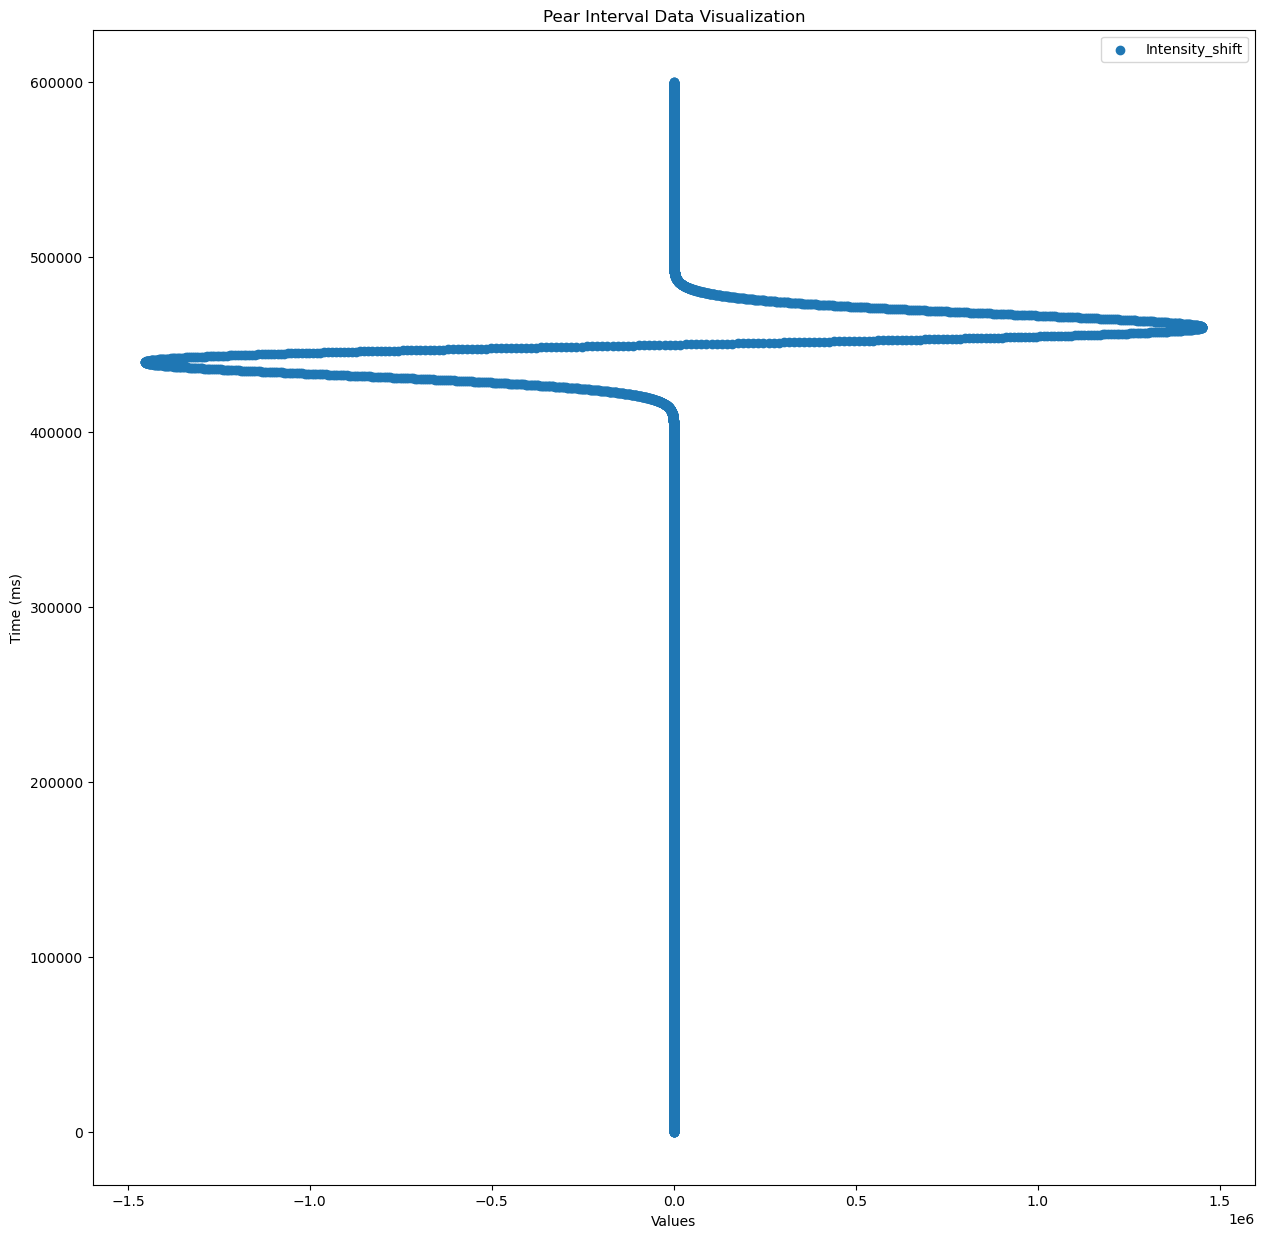

In [5]:

df_pear_shift = pd.read_csv('data/pear_final.csv')
df_pear_shift['Intensity_shift'] = df_pear_shift['Intensity'] - df_pear_shift['Intensity'].shift(-1)

X_shift = df_pear_shift.drop('Time (ms)', axis=1)
y_shift = df_pear_shift['Time (ms)']

plt.figure(figsize=(15,15))
plt.xlabel('Values')
plt.ylabel('Time (ms)')
plt.title('Pear Interval Data Visualization')
for c in X_shift.columns:
    if c.find('_shift')>-1:
        plt.scatter(X_shift[c].values,y_shift, label=c)
plt.legend()


# Scale Data Visualization

In [6]:

df_scale = pd.read_csv('data/scale_final.csv')

X = df_scale.drop('Time (min)', axis=1)
y = df_scale['Time (min)']


#dropdown_values = {"{0}: {1}".format(k, features_dict[k]):k for k in X.columns}
widgets.interact(data_plot(X, y), column=X.columns);

interactive(children=(Dropdown(description='column', options=('190', '200', '210', '220', '230', '240', '250',…

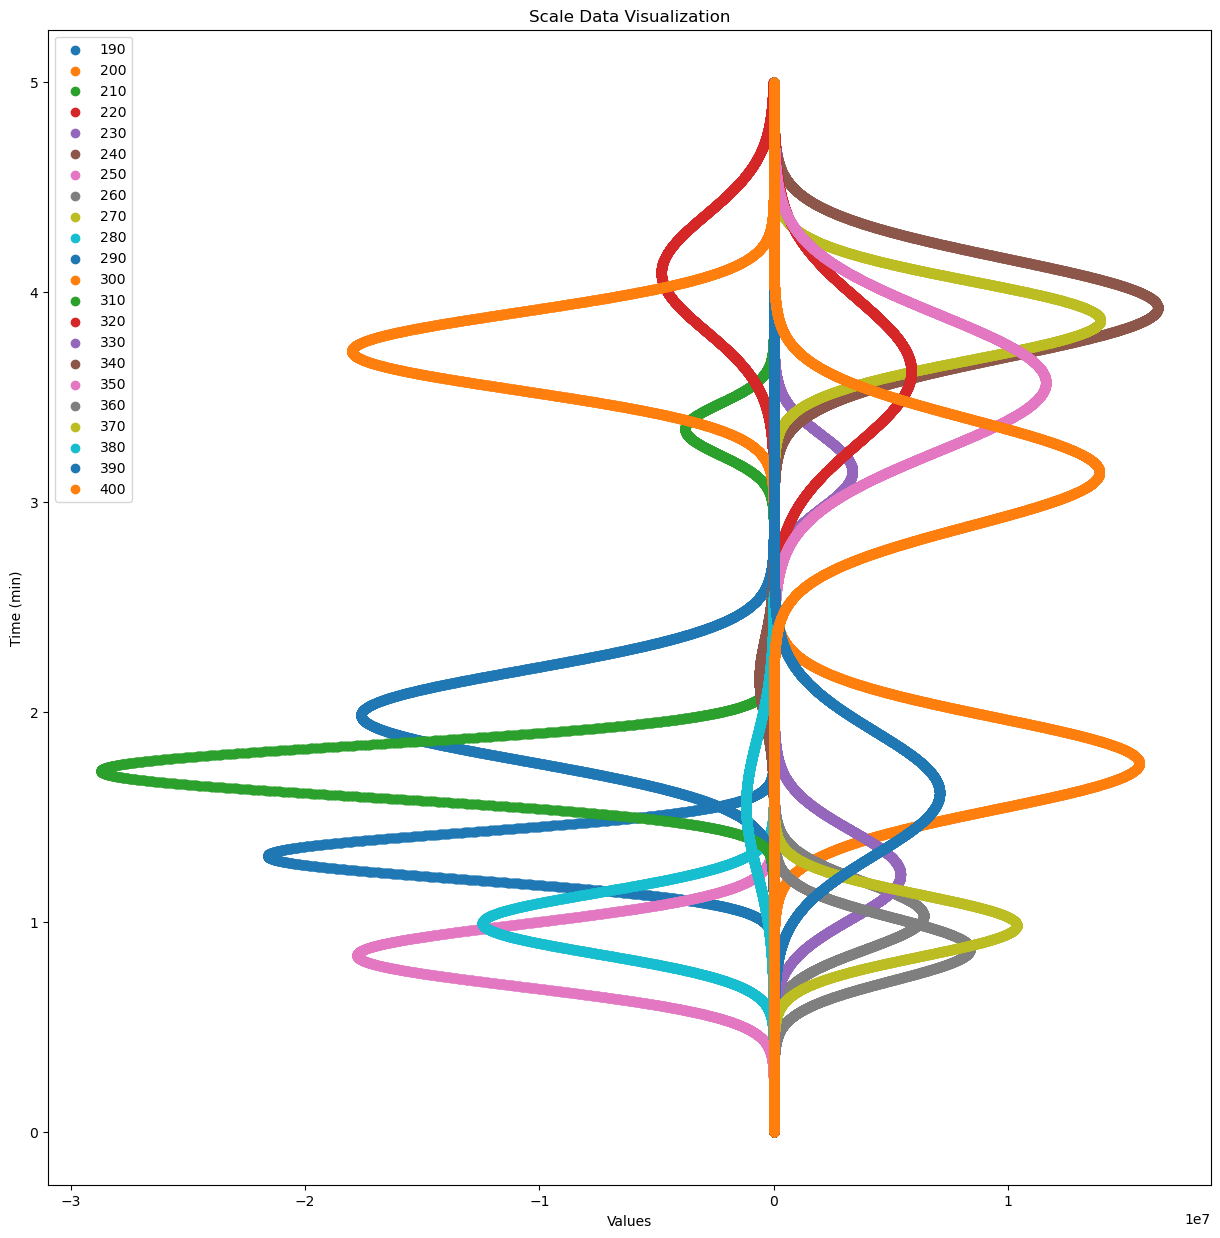

In [7]:
df_scale = pd.read_csv('data/scale_final.csv')

X = df_scale.drop('Time (min)', axis=1)
y = df_scale['Time (min)']

plt.figure(figsize=(15,15))
plt.xlabel('Values')
plt.ylabel('Time (min)')
plt.title('Scale Data Visualization')
for c in X.columns:
    plt.scatter(X[c].values,y, label=c)
plt.legend()

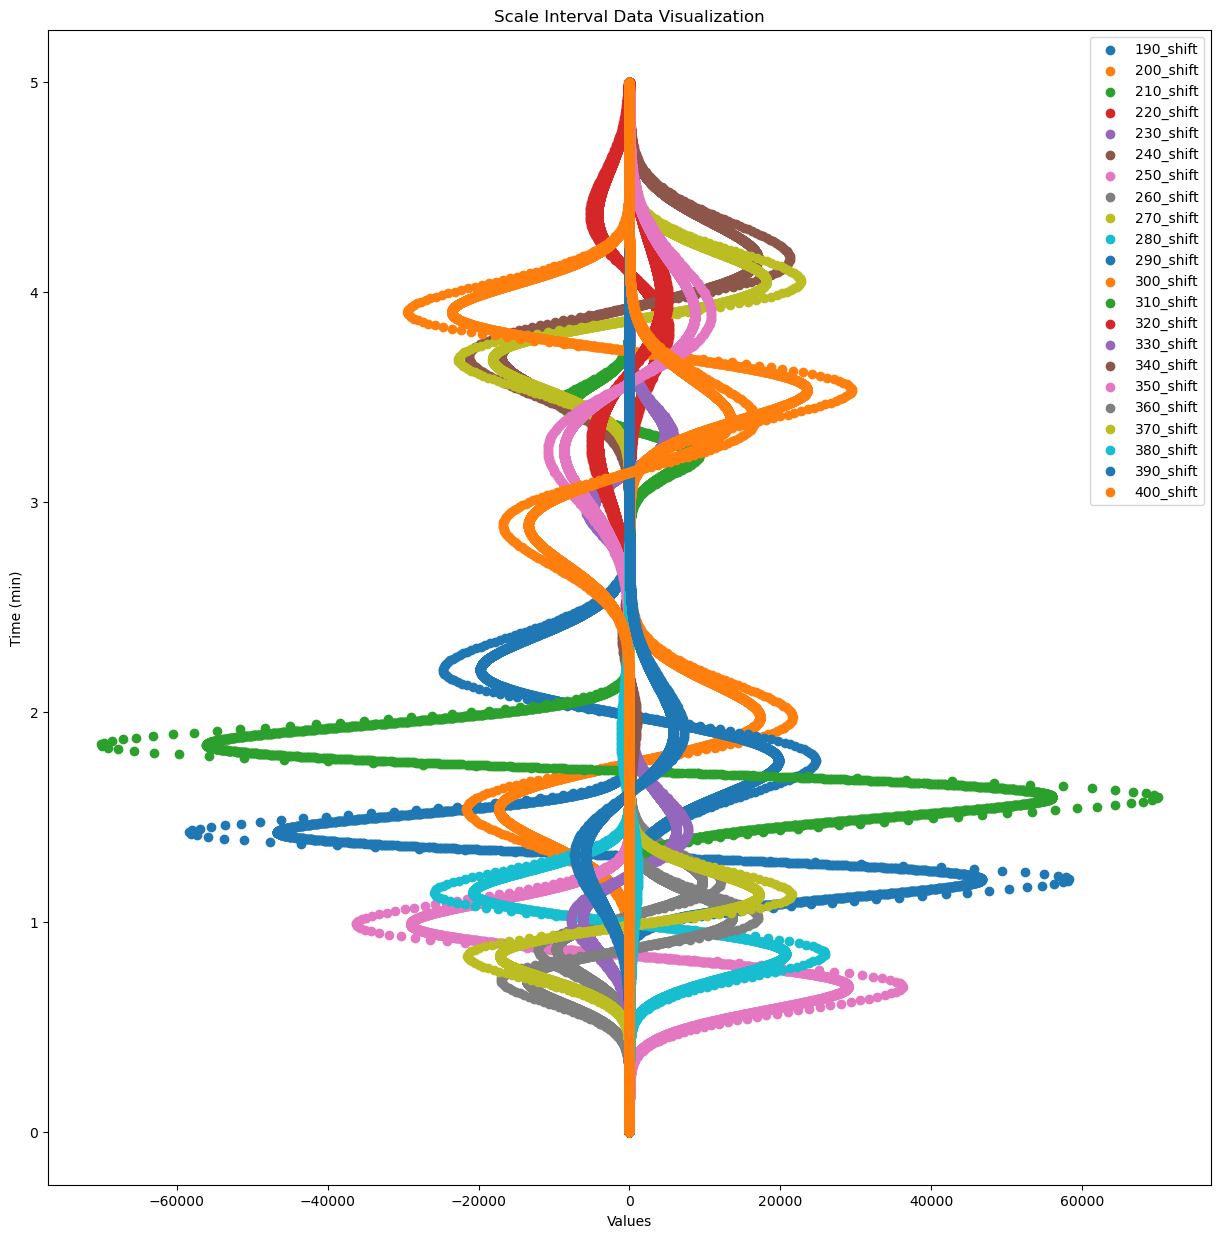

In [8]:
df_scale_shift = pd.read_csv('data/scale_final.csv')
for c in df_scale_shift.drop('Time (min)', axis=1).columns:
    df_scale_shift[c+'_shift'] = df_scale_shift[c] - df_scale_shift[c].shift(-1)

X_shift = df_scale_shift.drop('Time (min)', axis=1)
y_shift = df_scale_shift['Time (min)']

plt.figure(figsize=(15,15))
plt.xlabel('Values')
plt.ylabel('Time (min)')
plt.title('Scale Interval Data Visualization')
for c in X_shift.columns:
    if c.find('_shift')>-1:
        plt.scatter(X_shift[c].values,y_shift, label=c)
plt.legend()

In [9]:
columns = [c for c in df_scale_shift.drop('Time (min)',axis=1).columns if c.find('_shift')<0]
#dropdown_values = {"{0}: {1}".format(k, features_dict[k]):k for k in X.columns}
widgets.interact(data_plot_alt(df_scale_shift), column=columns);

interactive(children=(Dropdown(description='column', options=('190', '200', '210', '220', '230', '240', '250',…

# Mass Data Visualization

In [10]:
df_mass = pd.read_csv('data/mass_final.csv')

X = df_mass.drop('Time (min)', axis=1)
y = df_mass['Time (min)']


#dropdown_values = {"{0}: {1}".format(k, features_dict[k]):k for k in X.columns}
widgets.interact(data_plot(X, y), column=X.columns);

interactive(children=(Dropdown(description='column', options=('303', '311', '316', '371', '375', '388', '402',…

/Users/lucy/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/lucy/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


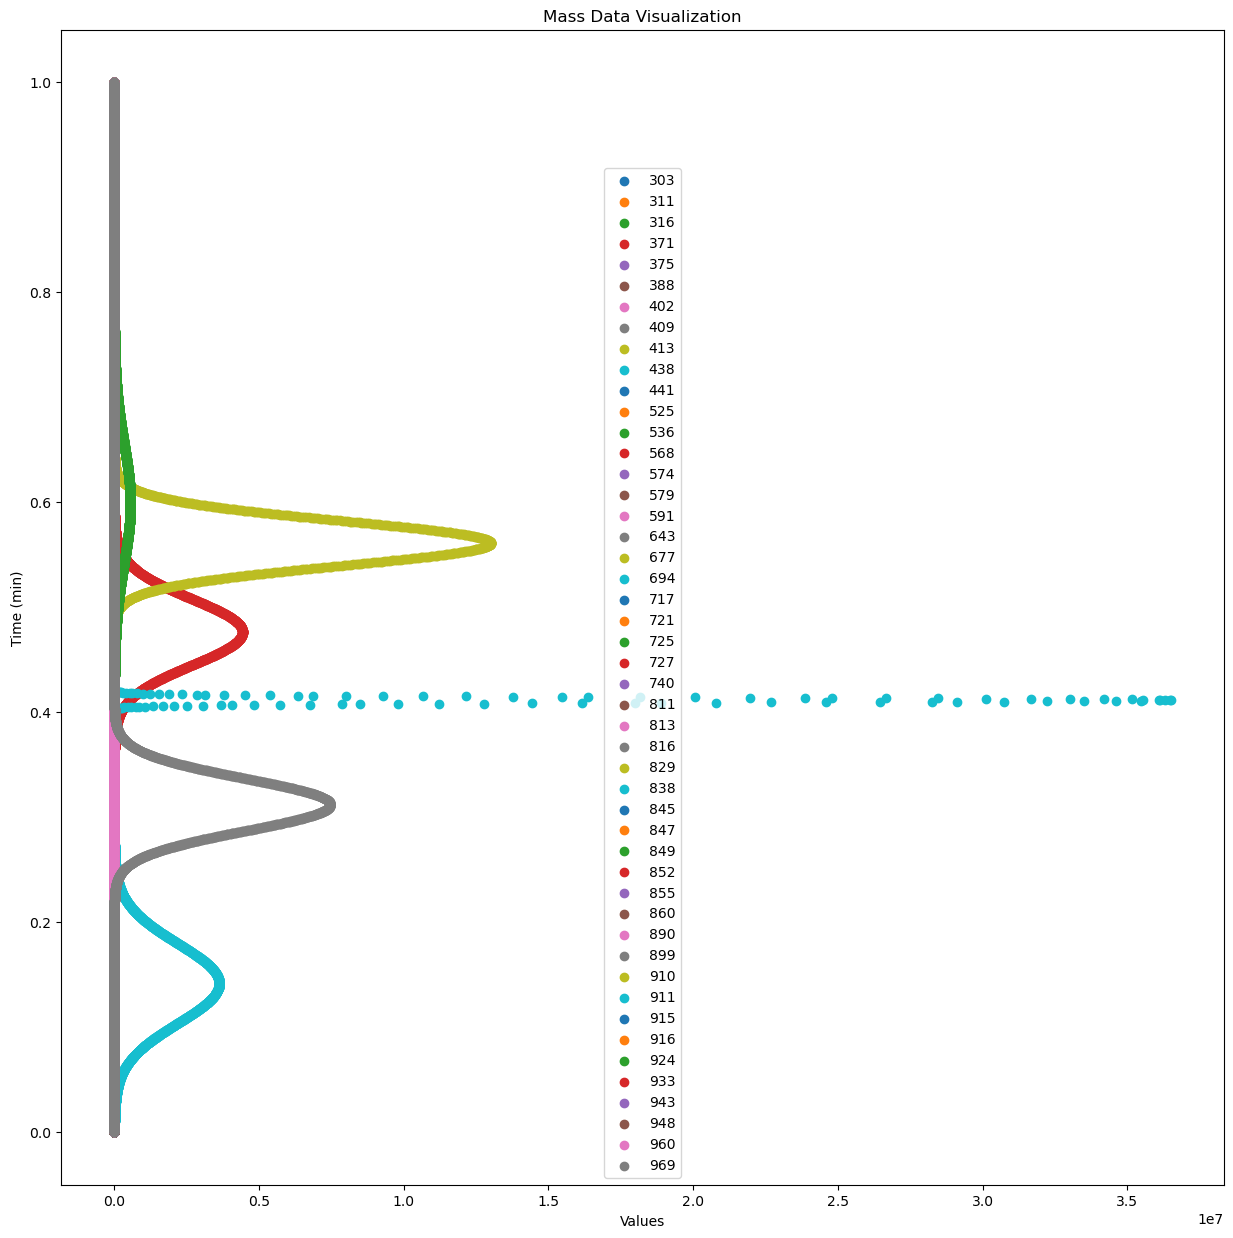

In [11]:
df_mass = pd.read_csv('data/mass_final.csv')

X = df_mass.drop('Time (min)', axis=1)
y = df_mass['Time (min)']

plt.figure(figsize=(15,15))
plt.xlabel('Values')
plt.ylabel('Time (min)')
plt.title('Mass Data Visualization')
for c in X.columns:
    plt.scatter(X[c].values,y, label=c)
plt.legend()

/Users/lucy/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/lucy/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


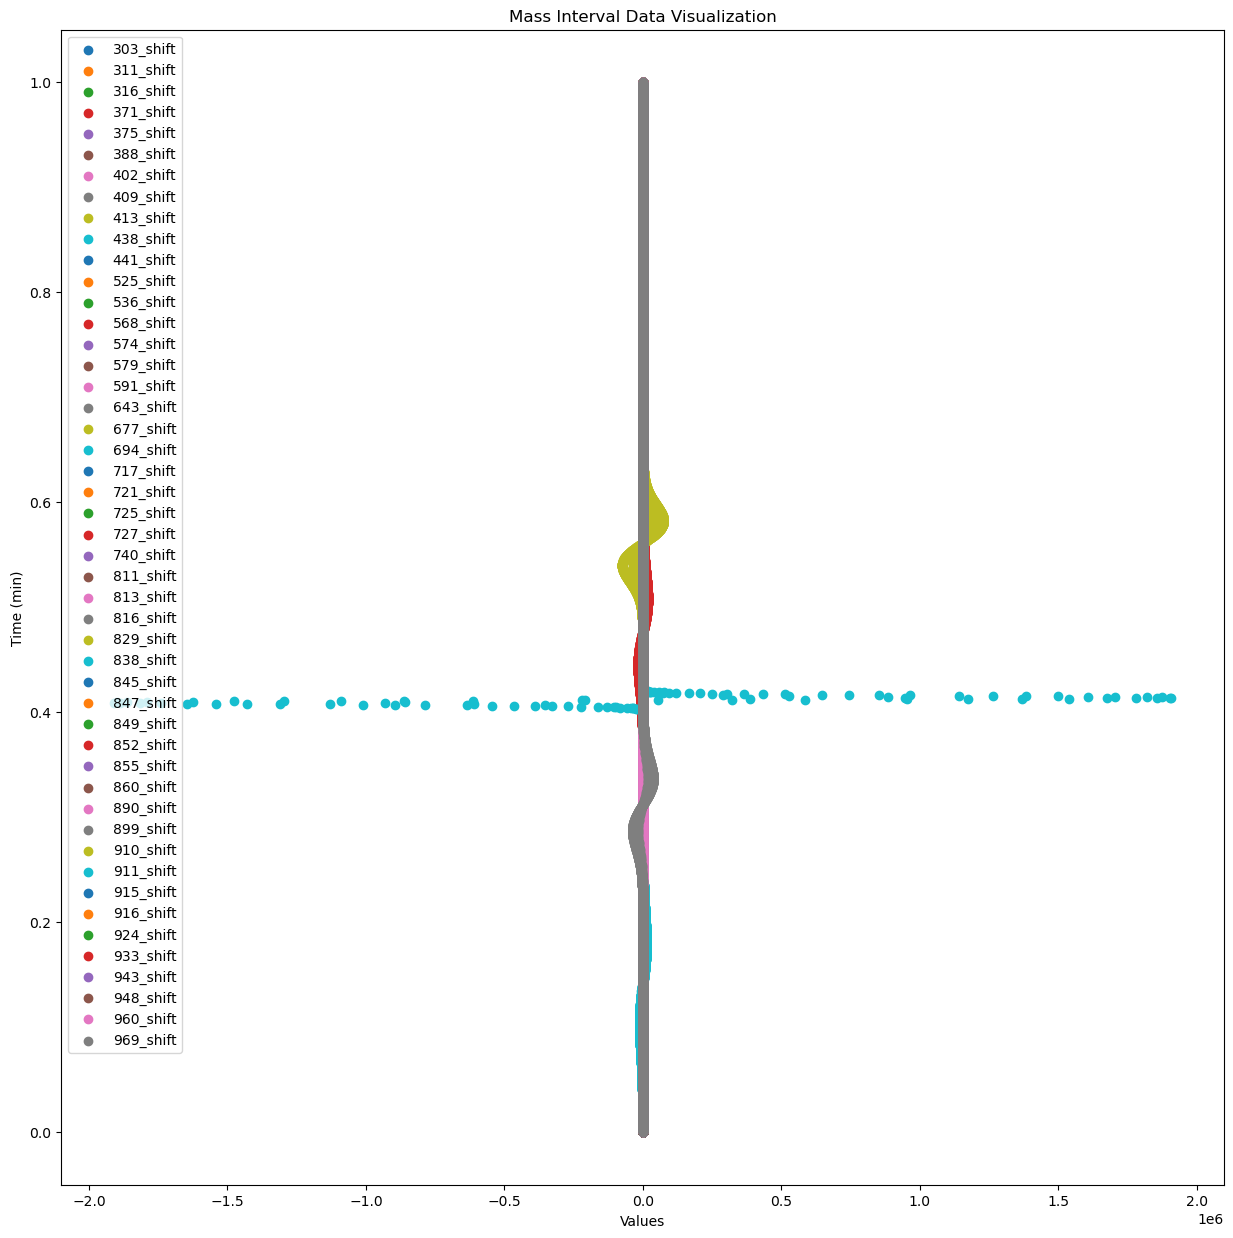

In [12]:
df_mass_shift = pd.read_csv('data/mass_final.csv')

for c in df_mass_shift.drop('Time (min)', axis=1).columns:
    df_mass_shift[c+'_shift'] = df_mass_shift[c] - df_mass_shift[c].shift(-1)

X_shift = df_mass_shift.drop('Time (min)', axis=1)
y_shift = df_mass_shift['Time (min)']


plt.figure(figsize=(15,15))
plt.xlabel('Values')
plt.ylabel('Time (min)')
plt.title('Mass Interval Data Visualization')
for c in X_shift.columns:
    if c.find('_shift')>-1:
        plt.scatter(X_shift[c].values,y_shift, label=c)
plt.legend()

In [13]:
columns = [c for c in df_mass_shift.drop('Time (min)',axis=1).columns if c.find('_shift')<0]
#dropdown_values = {"{0}: {1}".format(k, features_dict[k]):k for k in X.columns}
widgets.interact(data_plot_alt(df_mass_shift), column=columns);

interactive(children=(Dropdown(description='column', options=('303', '311', '316', '371', '375', '388', '402',…

# Visualizing the molecules and draw a random molecule.

In [14]:
from torch_geometric.data import DataLoader
from torch_geometric.datasets import TUDataset

path = 'data'
dataset = TUDataset(path, name='Mutagenicity').shuffle()
test_dataset = dataset[:len(dataset) // 10]
train_dataset = dataset[len(dataset) // 10:]
test_loader = DataLoader(test_dataset, batch_size=128)
train_loader = DataLoader(train_dataset, batch_size=128)

/Users/lucy/anaconda3/lib/python3.10/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [15]:
import networkx as nx
import numpy as np

from torch_geometric.utils import to_networkx


def draw_molecule(g, edge_mask=None, draw_edge_labels=False):
    g = g.copy().to_undirected()
    node_labels = {}
    for u, data in g.nodes(data=True):
        node_labels[u] = data['name']
    pos = nx.planar_layout(g)
    pos = nx.spring_layout(g, pos=pos)
    if edge_mask is None:
        edge_color = 'black'
        widths = None
    else:
        edge_color = [edge_mask[(u, v)] for u, v in g.edges()]
        widths = [x * 10 for x in edge_color]
    nx.draw_networkx(g, pos=pos, labels=node_labels, width=widths,
            edge_color=edge_color, edge_cmap=plt.cm.Blues,
            node_color='azure')
    
    if draw_edge_labels and edge_mask is not None:
        edge_labels = {k: ('%.2f' % v) for k, v in edge_mask.items()}    
        nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels,
                                    font_color='red')
    plt.show()


def to_molecule(data):
    ATOM_MAP = ['C', 'O', 'Cl', 'H', 'N', 'F',
                'Br', 'S', 'P', 'I', 'Na', 'K', 'Li', 'Ca']
    g = to_networkx(data, node_attrs=['x'])
    for u, data in g.nodes(data=True):
        data['name'] = ATOM_MAP[data['x'].index(1.0)]
        del data['x']
    return g

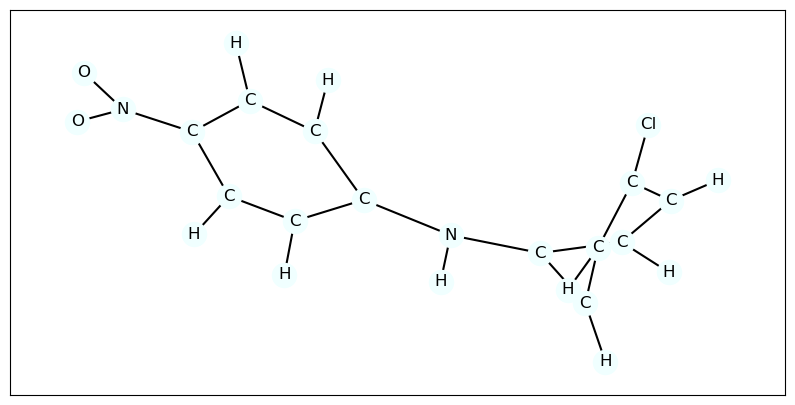

In [16]:
import random

data = random.choice([t for t in train_dataset])
mol = to_molecule(data)
plt.figure(figsize=(10, 5))
draw_molecule(mol)

In [17]:
data

Data(edge_index=[2, 54], x=[26, 14], edge_attr=[54, 3], y=[1])

## Train a GNN model with 5 convolution layers. We use GraphConv which supports edge_weight as a parameter. Many convolution layers in Pytorch Geometric supoort this argument.

In [18]:
import torch
import torch.nn.functional as F
from torch.nn import Linear

from torch_geometric.nn import global_add_pool, GraphConv

class Net(torch.nn.Module):
    def __init__(self, dim):
        super(Net, self).__init__()

        num_features = dataset.num_features
        self.dim = dim

        self.conv1 = GraphConv(num_features, dim)
        self.conv2 = GraphConv(dim, dim)
        self.conv3 = GraphConv(dim, dim)
        self.conv4 = GraphConv(dim, dim)
        self.conv5 = GraphConv(dim, dim)

        self.fc1 = Linear(dim, dim)
        self.fc2 = Linear(dim, dataset.num_classes)

    def forward(self, x, edge_index, batch, edge_weight=None):
        x = F.relu(self.conv1(x, edge_index, edge_weight))
        x = F.relu(self.conv2(x, edge_index, edge_weight))
        x = F.relu(self.conv3(x, edge_index, edge_weight))
        x = F.relu(self.conv4(x, edge_index, edge_weight))
        x = F.relu(self.conv5(x, edge_index, edge_weight))
        x = global_add_pool(x, batch)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=-1)

In [19]:
def train(epoch):
    model.train()

    if epoch == 51:
        for param_group in optimizer.param_groups:
            param_group['lr'] = 0.5 * param_group['lr']

    loss_all = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        output = model(data.x, data.edge_index, data.batch)
        loss = F.nll_loss(output, data.y)
        loss.backward()
        loss_all += loss.item() * data.num_graphs
        optimizer.step()
    return loss_all / len(train_dataset)


def test(loader):
    model.eval()

    correct = 0
    for data in loader:
        data = data.to(device)
        output = model(data.x, data.edge_index, data.batch)
        pred = output.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net(dim=32).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(1, 101):
    train_loss = train(epoch)
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print('Epoch: {:03d}, Train Loss: {:.7f}, '
          'Train Acc: {:.7f}, Test Acc: {:.7f}'.format(epoch, train_loss,
                                                       train_acc, test_acc))


Epoch: 001, Train Loss: 0.8447793, Train Acc: 0.6518955, Test Acc: 0.6489607
Epoch: 002, Train Loss: 0.6443798, Train Acc: 0.6711066, Test Acc: 0.6720554
Epoch: 003, Train Loss: 0.6196451, Train Acc: 0.6782787, Test Acc: 0.6905312
Epoch: 004, Train Loss: 0.6062027, Train Acc: 0.6962090, Test Acc: 0.7043880
Epoch: 005, Train Loss: 0.5869003, Train Acc: 0.7218238, Test Acc: 0.7136259
Epoch: 006, Train Loss: 0.5736373, Train Acc: 0.7446209, Test Acc: 0.7297921
Epoch: 007, Train Loss: 0.5558255, Train Acc: 0.7456455, Test Acc: 0.7205543
Epoch: 008, Train Loss: 0.5391887, Train Acc: 0.7658811, Test Acc: 0.7436490
Epoch: 009, Train Loss: 0.5278911, Train Acc: 0.7725410, Test Acc: 0.7528868
Epoch: 010, Train Loss: 0.5211862, Train Acc: 0.7797131, Test Acc: 0.7598152
Epoch: 011, Train Loss: 0.5155439, Train Acc: 0.7904713, Test Acc: 0.7598152
Epoch: 012, Train Loss: 0.5007147, Train Acc: 0.7968750, Test Acc: 0.7690531
Epoch: 013, Train Loss: 0.4986018, Train Acc: 0.7971311, Test Acc: 0.7644342

In [21]:
from captum.attr import Saliency, IntegratedGradients

def model_forward(edge_mask, data):
    batch = torch.zeros(data.x.shape[0], dtype=int).to(device)
    out = model(data.x, data.edge_index, batch, edge_mask)
    return out


def explain(method, data, target=0):
    input_mask = torch.ones(data.edge_index.shape[1]).requires_grad_(True).to(device)
    if method == 'ig':
        ig = IntegratedGradients(model_forward)
        mask = ig.attribute(input_mask, target=target,
                            additional_forward_args=(data,),
                            internal_batch_size=data.edge_index.shape[1])
    elif method == 'saliency':
        saliency = Saliency(model_forward)
        mask = saliency.attribute(input_mask, target=target,
                                  additional_forward_args=(data,))
    else:
        raise Exception('Unknown explanation method')

    edge_mask = np.abs(mask.cpu().detach().numpy())
    if edge_mask.max() > 0:  # avoid division by zero
        edge_mask = edge_mask / edge_mask.max()
    return edge_mask

## Explaining the predictions

Now we look at two popular attribution methods. First, we calculate the gradient of the output with respect to the edge weights $w_{e_i}$. Edge weights are initially one for all edges.
For the saliency method, we use the absolute value of the gradient as the attribution value for each edge:

$$
Attribution_{e_i} = |\frac{\partial F(x)}{\partial w_{e_i}}|
$$

Where $x$ is the input and $F(x)$ is the output of the GNN model on input $x$.

For Integrated Gradients method, we interpolate between the current input and a baseline input where the weight of all edges is zero and accumulate the gradient values for each edge:

$$
Attribution_{e_i} = \int_{\alpha =0}^1 \frac{\partial F(x_{\alpha)}}{\partial w_{e_i}} d\alpha
$$

Where $x_{\alpha}$ is the same as the original input graph but the weight of all edges is set to $\alpha$. Integrated Gradients complete formulation is more complicated but since our initial edge weights are equal to one and the baseline is zero, it can be simplified to the formulation above. You can read more about this method [here](https://arxiv.org/abs/1703.01365). Of course, this can not be calculated directly and is approximated by a discrete sum.

We use the [captum](https://captum.ai/) library for calculating the attribution values. We define the `model_forward` function which calculates the `batch` argument assuming that we are only explaining a single graph at a time.



Finally we take a random sample from the test dataset and run the explanation methods. For a simpler visualization, we make the graph undirected and merge the explanations of each edge in both directions.

It is known that NO2 substructure makes the molecules mutagenic in many cases and you can verify this by the model explanations.

Mutagenic molecules have label 0 in this dataset and we only sample from those molecules but you can change the code and see the explanations for the other class as well.

In this visualization, edge colors and thickness represent the importance. You can also see the numeric value by passing `draw_edge_labels` to `draw_molecule` function.

As you can see Integrated Gradients tend to create more accurate explanations.

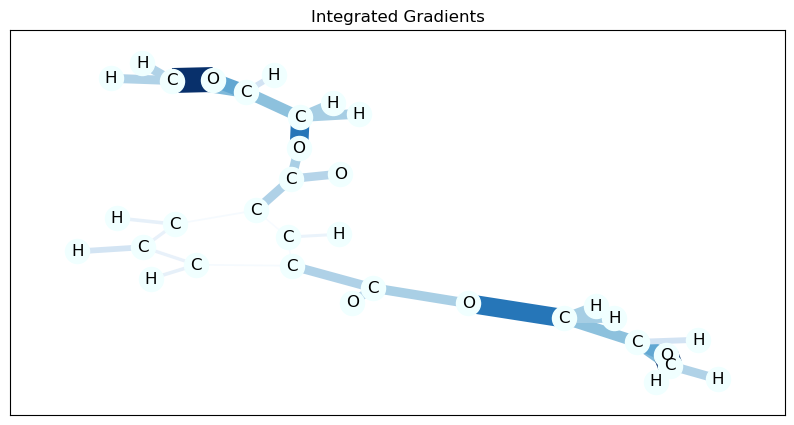

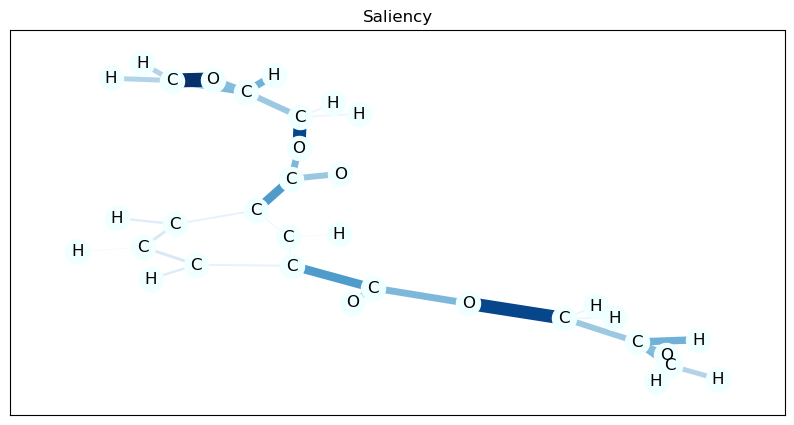

In [22]:
import random
from collections import defaultdict

def aggregate_edge_directions(edge_mask, data):
    edge_mask_dict = defaultdict(float)
    for val, u, v in list(zip(edge_mask, *data.edge_index)):
        u, v = u.item(), v.item()
        if u > v:
            u, v = v, u
        edge_mask_dict[(u, v)] += val
    return edge_mask_dict
    

data = random.choice([t for t in test_dataset if not t.y.item()])
mol = to_molecule(data)

for title, method in [('Integrated Gradients', 'ig'), ('Saliency', 'saliency')]:
    edge_mask = explain(method, data, target=0)
    edge_mask_dict = aggregate_edge_directions(edge_mask, data)
    plt.figure(figsize=(10, 5))
    plt.title(title)
    draw_molecule(mol, edge_mask_dict)